In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt #서브 패키지 pyplot 사용
%matplotlib inline
from sklearn.cluster import KMeans

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
else:
    print('Unknown system...  sorry~~~')

In [4]:
data=pd.read_csv('project_all.csv')
hh=pd.read_csv('../total_household/total_household_2020.csv')
hh.set_index('sigungu', inplace=True)
hh.sort_index(inplace=True)

In [5]:
data.set_index('시군구', inplace=True)
data['총가구수']=hh['2020']
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88 entries, 강원도 고성군 to 충청북도 제천시
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SIG_CD       88 non-null     int64  
 1   SIG_KOR_NM   88 non-null     object 
 2   인구수          88 non-null     float64
 3   사망률          88 non-null     float64
 4   고령화비율        88 non-null     float64
 5   전체 가구수       88 non-null     int64  
 6   산림면적(ha)     88 non-null     int64  
 7   고용률          88 non-null     float64
 8   경제활동인구       88 non-null     float64
 9   유소년비율        88 non-null     float64
 10  조출생률         88 non-null     float64
 11  1인 가구비율      88 non-null     float64
 12  터널수          88 non-null     int64  
 13  만명당 매장 수     88 non-null     float64
 14  만명 당 의료기관 수  88 non-null     float64
 15  만명당 3차병원수    88 non-null     float64
 16  만명당 2차병원 수   88 non-null     float64
 17  만명당 1차병원 수   88 non-null     float64
 18  만명당 요양병원 수   88 non-null     float64
 19  만먕당

In [6]:
cluster_1=pd.read_csv('cluster.csv')
cluster_1.set_index('sigungu',inplace=True)
cluster_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88 entries, 강원도 고성군 to 충청북도 제천시
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   cluster  88 non-null     int64
dtypes: int64(1)
memory usage: 1.4+ KB


In [7]:
data['cluster']=cluster_1['cluster']
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88 entries, 강원도 고성군 to 충청북도 제천시
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SIG_CD       88 non-null     int64  
 1   SIG_KOR_NM   88 non-null     object 
 2   인구수          88 non-null     float64
 3   사망률          88 non-null     float64
 4   고령화비율        88 non-null     float64
 5   전체 가구수       88 non-null     int64  
 6   산림면적(ha)     88 non-null     int64  
 7   고용률          88 non-null     float64
 8   경제활동인구       88 non-null     float64
 9   유소년비율        88 non-null     float64
 10  조출생률         88 non-null     float64
 11  1인 가구비율      88 non-null     float64
 12  터널수          88 non-null     int64  
 13  만명당 매장 수     88 non-null     float64
 14  만명 당 의료기관 수  88 non-null     float64
 15  만명당 3차병원수    88 non-null     float64
 16  만명당 2차병원 수   88 non-null     float64
 17  만명당 1차병원 수   88 non-null     float64
 18  만명당 요양병원 수   88 non-null     float64
 19  만먕당

In [8]:
df = data[data['cluster'].isin([0])]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 강원도 삼척시 to 충청북도 옥천군
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SIG_CD       30 non-null     int64  
 1   SIG_KOR_NM   30 non-null     object 
 2   인구수          30 non-null     float64
 3   사망률          30 non-null     float64
 4   고령화비율        30 non-null     float64
 5   전체 가구수       30 non-null     int64  
 6   산림면적(ha)     30 non-null     int64  
 7   고용률          30 non-null     float64
 8   경제활동인구       30 non-null     float64
 9   유소년비율        30 non-null     float64
 10  조출생률         30 non-null     float64
 11  1인 가구비율      30 non-null     float64
 12  터널수          30 non-null     int64  
 13  만명당 매장 수     30 non-null     float64
 14  만명 당 의료기관 수  30 non-null     float64
 15  만명당 3차병원수    30 non-null     float64
 16  만명당 2차병원 수   30 non-null     float64
 17  만명당 1차병원 수   30 non-null     float64
 18  만명당 요양병원 수   30 non-null     float64
 19  만먕당

In [9]:
df.to_csv('cluster_0s.csv')

In [10]:
cluster=pd.read_csv('project_result_0.csv')
cluster.set_index('시군구',inplace=True)

In [11]:
df['cluster']=cluster[['cluster']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 강원도 삼척시 to 충청북도 옥천군
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SIG_CD       30 non-null     int64  
 1   SIG_KOR_NM   30 non-null     object 
 2   인구수          30 non-null     float64
 3   사망률          30 non-null     float64
 4   고령화비율        30 non-null     float64
 5   전체 가구수       30 non-null     int64  
 6   산림면적(ha)     30 non-null     int64  
 7   고용률          30 non-null     float64
 8   경제활동인구       30 non-null     float64
 9   유소년비율        30 non-null     float64
 10  조출생률         30 non-null     float64
 11  1인 가구비율      30 non-null     float64
 12  터널수          30 non-null     int64  
 13  만명당 매장 수     30 non-null     float64
 14  만명 당 의료기관 수  30 non-null     float64
 15  만명당 3차병원수    30 non-null     float64
 16  만명당 2차병원 수   30 non-null     float64
 17  만명당 1차병원 수   30 non-null     float64
 18  만명당 요양병원 수   30 non-null     float64
 19  만먕당

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

rc('font', family='AppleGothic')
sns.set(font='AppleGothic', rc={'axes.unicode_minus':False}, style='whitegrid')

sns.scatterplot(x='산림면적(ha)', y='터널수', hue='cluster', style='cluster', s=60,data=df)

df.reset_index(inplace=True)
for i in range(len(df)):
    row=df.iloc[i]
    name=row['시군구']
    x = row['산림면적(ha)']
    y = row['터널수']
    if name in ['강원도 홍천군','충청북도 옥천군','경상남도 밀양시','경상북도 안동시','전라북도 남원시']:
        plt.text(x-30000, y+2, name, fontsize=6)
    else :
        pass
df.set_index('시군구', inplace=True)

plt.title('인구감소지역 산림면적 당 터널 수_0군집')
plt.xlabel('산림면적(ha)')
plt.ylabel('터널 수')
plt.legend(fontsize=6)
plt.savefig('output/oph_total_0.png', bbox_inches='tight')
plt.show()

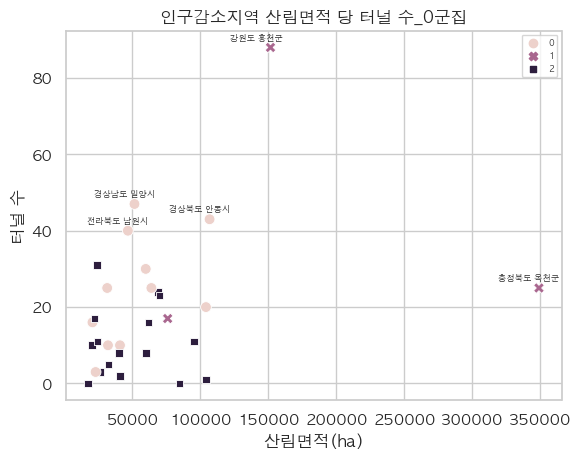

In [12]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

rc('font', family='AppleGothic')
sns.set(font='AppleGothic', rc={'axes.unicode_minus':False}, style='whitegrid')

sns.scatterplot(x='산림면적(ha)', y='터널수', hue='cluster', style='cluster', s=60,data=df)

df.reset_index(inplace=True)
for i in range(len(df)):
    row=df.iloc[i]
    name=row['시군구']
    x = row['산림면적(ha)']
    y = row['터널수']
    if name in ['강원도 홍천군','충청북도 옥천군','경상남도 밀양시','경상북도 안동시','전라북도 남원시']:
        plt.text(x-30000, y+2, name, fontsize=6)
    else :
        pass
df.set_index('시군구', inplace=True)

plt.title('인구감소지역 산림면적 당 터널 수_0군집')
plt.xlabel('산림면적(ha)')
plt.ylabel('터널 수')
plt.legend(fontsize=6)
plt.savefig('output/oph_total_0.png', bbox_inches='tight')
plt.show()

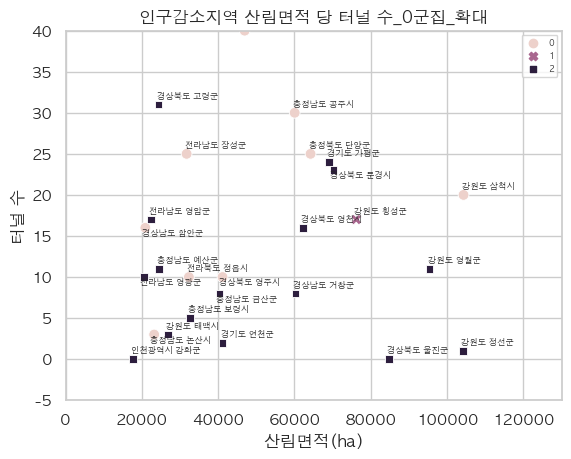

In [13]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

rc('font', family='AppleGothic')
sns.set(font='AppleGothic', rc={'axes.unicode_minus':False}, style='whitegrid')

sns.scatterplot(x='산림면적(ha)', y='터널수', hue='cluster', style='cluster', s=60,data=df)

df.reset_index(inplace=True)
for i in range(len(df)):
    row=df.iloc[i]
    name=row['시군구']
    x = row['산림면적(ha)']
    y = row['터널수']
    if name in ['강원도 홍천군','충청북도 옥천군','경상남도 밀양시','경상북도 안동시','전라북도 남원시']:
        pass
    elif name in ['경상북도 문경시','경상남도 함안군','전라남도 영광군','경상북도 영주시','충청남도 논산시','충청남도 금산군']:
        plt.text(x-1000, y-0.9, name, fontsize=6)
    else :
        plt.text(x-500, y+0.8, name, fontsize=6)
df.set_index('시군구', inplace=True)

plt.axis([0,130000,-5,40])
plt.title('인구감소지역 산림면적 당 터널 수_0군집_확대')
plt.xlabel('산림면적(ha)')
plt.ylabel('터널 수')
plt.legend(fontsize=6)
plt.savefig('output/oph_total_0_zoom.png', bbox_inches='tight')
plt.show()

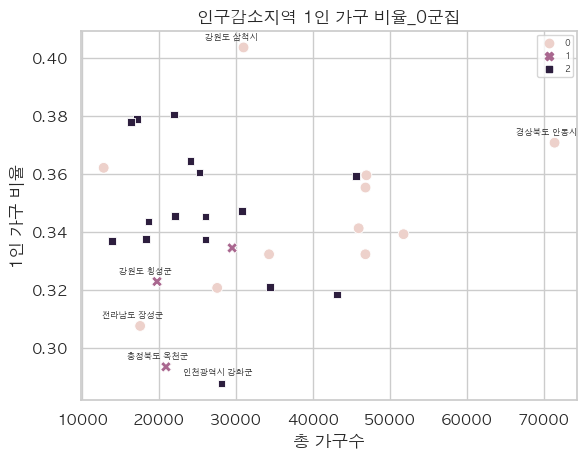

In [14]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

rc('font', family='AppleGothic')
sns.set(font='AppleGothic', rc={'axes.unicode_minus':False}, style='whitegrid')

sns.scatterplot(x='총가구수', y='1인 가구비율', hue='cluster', style='cluster',s=60,data=df)

df.reset_index(inplace=True)
for i in range(len(df)):
    row=df.iloc[i]
    name=row['시군구']
    x = row['총가구수']
    y = row['1인 가구비율']
    if name in ['강원도 삼척시','경상북도 안동시','강원도 횡성군','전라남도 장성군','충청북도 옥천군','인천광역시 강화군'] :
        plt.text(x-5000, y+0.003, name, fontsize=6)
    else :
        pass
df.set_index('시군구', inplace=True)

plt.title('인구감소지역 1인 가구 비율_0군집')
plt.xlabel('총 가구수')
plt.ylabel('1인 가구 비율')
plt.legend(fontsize=6)
plt.savefig('output/oph_total_0.png', bbox_inches='tight')
plt.show()

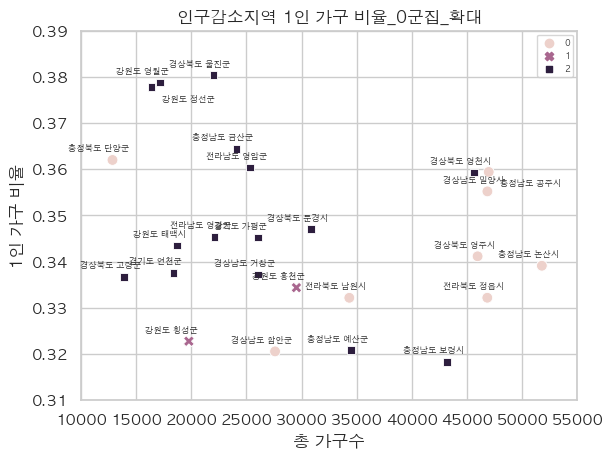

In [15]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

rc('font', family='AppleGothic')
sns.set(font='AppleGothic', rc={'axes.unicode_minus':False}, style='whitegrid')

sns.scatterplot(x='총가구수', y='1인 가구비율', hue='cluster', style='cluster',s=60,data=df)

df.reset_index(inplace=True)
for i in range(len(df)):
    row=df.iloc[i]
    name=row['시군구']
    x = row['총가구수']
    y = row['1인 가구비율']
    if name in ['강원도 삼척시','경상북도 안동시','전라남도 장성군','충청북도 옥천군','인천광역시 강화군'] :
        pass
    elif name in ['강원도 정선군', '충청남도 공주시']:
        plt.text(x+1000, y-0.003, name,fontsize=6)
    else : 
        plt.text(x-4000, y+0.002, name, fontsize=6)
df.set_index('시군구', inplace=True)

plt.axis([10000,55000,0.31,0.39])
plt.title('인구감소지역 1인 가구 비율_0군집_확대')
plt.xlabel('총 가구수')
plt.ylabel('1인 가구 비율')
plt.legend(fontsize=6)
plt.savefig('output/oph_total_0_zoom.png', bbox_inches='tight')
plt.show()

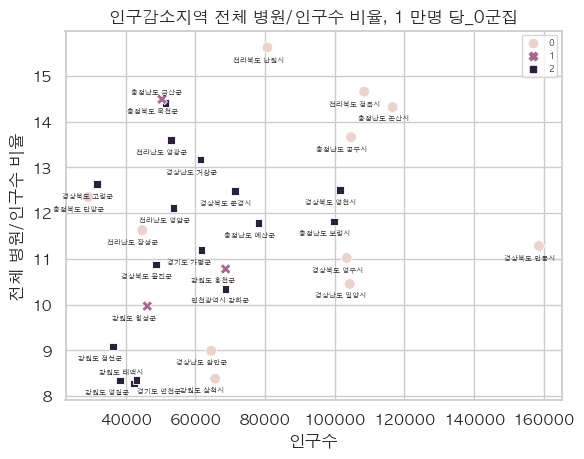

In [16]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

rc('font', family='AppleGothic')
sns.set(font='AppleGothic', rc={'axes.unicode_minus':False}, style='whitegrid')

sns.scatterplot(x='인구수', y='만명 당 의료기관 수', hue='cluster', style='cluster',s=60,data=df)

df.reset_index(inplace=True)
for i in range(len(df)):
    row=df.iloc[i]
    name=row['시군구']
    x = row['인구수']
    y = row['만명 당 의료기관 수']
    if name in ['충청남도 금산군', '강원도 태백시']:
        plt.text(x-10000, y+0.2, name, fontsize=5)
    elif name in ['경기도 연천군']:
        plt.text(x, y-0.3, name, fontsize=5)
    else :
        plt.text(x-10000, y-0.3, name, fontsize=5)
df.set_index('시군구', inplace=True)

plt.title('인구감소지역 전체 병원/인구수 비율, 1 만명 당_0군집')
plt.xlabel('인구수')
plt.ylabel('전체 병원/인구수 비율')
plt.legend(fontsize=6)
plt.savefig('output/hs_total_0.png', bbox_inches='tight')
plt.show()

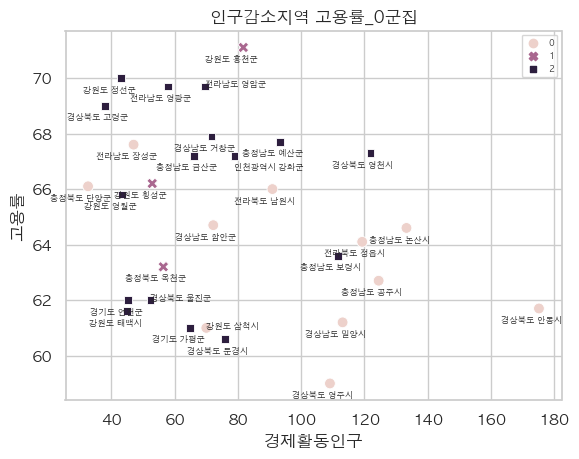

In [17]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

rc('font', family='AppleGothic')
sns.set(font='AppleGothic', rc={'axes.unicode_minus':False}, style='whitegrid')

sns.scatterplot(x='경제활동인구', y='고용률', hue='cluster', style='cluster',s=60,data=df)

df.reset_index(inplace=True)
for i in range(len(df)):
    row=df.iloc[i]
    name=row['시군구']
    x = row['경제활동인구']
    y = row['고용률']
    if name in ['전라남도 영암군','경상북도 울진군','강원도 삼척시']:
        plt.text(x,y,name,fontsize=6)
    elif name in ['인천광역시 강화군']:
        plt.text(x,y-0.5,name,fontsize=6)
    else :
        plt.text(x-12, y-0.5, name, fontsize=6)
df.set_index('시군구', inplace=True)

plt.title('인구감소지역 고용률_0군집')
plt.xlabel('경제활동인구')
plt.ylabel('고용률')
plt.legend(fontsize=6)
plt.savefig('output/emp_rate_0.png', bbox_inches='tight')
plt.show()

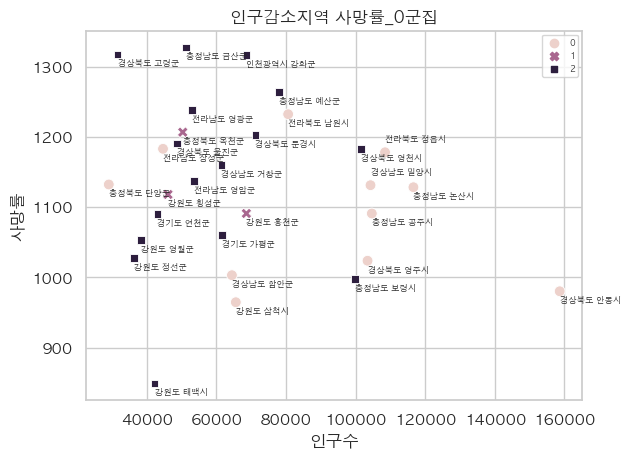

In [18]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

rc('font', family='AppleGothic')
sns.set(font='AppleGothic', rc={'axes.unicode_minus':False}, style='whitegrid')

sns.scatterplot(x='인구수', y='사망률', hue='cluster', style='cluster',s=60,data=df)

df.reset_index(inplace=True)
for i in range(len(df)):
    row=df.iloc[i]
    name=row['시군구']
    x = row['인구수']
    y = row['사망률']
    if name in ['전라북도 정읍시','경상남도 밀양시']:
        plt.text(x,y+15,name,fontsize=6)
    else : 
        plt.text(x-0.5, y-16, name, fontsize=6)
df.set_index('시군구', inplace=True)

plt.title('인구감소지역 사망률_0군집')
plt.xlabel('인구수')
plt.ylabel('사망률')
plt.legend(fontsize=6)
plt.savefig('output/death_rate_0.png', bbox_inches='tight')
plt.show()

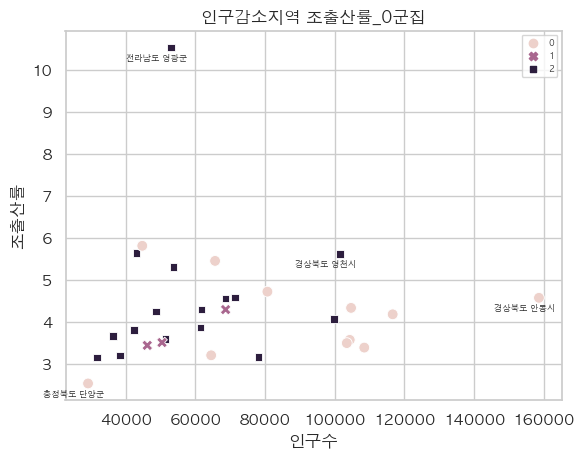

In [19]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

rc('font', family='AppleGothic')
sns.set(font='AppleGothic', rc={'axes.unicode_minus':False}, style='whitegrid')

sns.scatterplot(x='인구수', y='조출생률', hue='cluster', style='cluster',s=60,data=df)

df.reset_index(inplace=True)
for i in range(len(df)):
    row=df.iloc[i]
    name=row['시군구']
    x = row['인구수']
    y = row['조출생률']
    if name in ['전라남도 영광군', '경상북도 영천시', '경상북도 안동시', '충청북도 단양군']:
        plt.text(x-13000, y-0.3, name, fontsize=6)
    else :
        pass
df.set_index('시군구', inplace=True)

plt.title('인구감소지역 조출산률_0군집')
plt.xlabel('인구수')
plt.ylabel('조출산률')
plt.legend(fontsize=6)
plt.savefig('output/birth_rate_0.png', bbox_inches='tight')
plt.show()

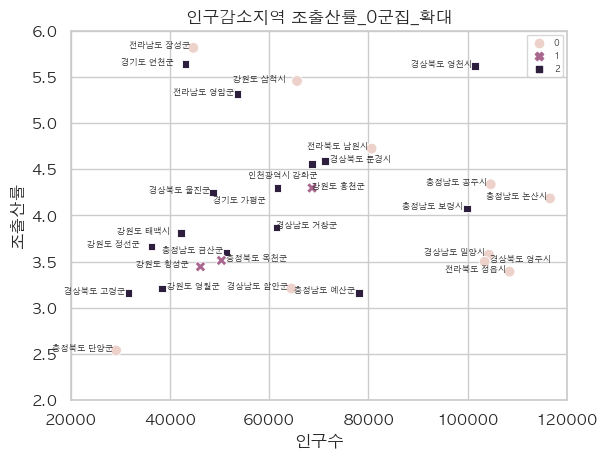

In [20]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

rc('font', family='AppleGothic')
sns.set(font='AppleGothic', rc={'axes.unicode_minus':False}, style='whitegrid')

sns.scatterplot(x='인구수', y='조출생률', hue='cluster', style='cluster',s=60,data=df)

df.reset_index(inplace=True)
for i in range(len(df)):
    row=df.iloc[i]
    name=row['시군구']
    x = row['인구수']
    y = row['조출생률']
    if name in ['전라남도 영광군', '경상북도 안동시']:
        pass
    elif name in ['경상북도 문경시','경상북도 영주시','충청북도 옥천군','강원도 영월군']:
        plt.text(x+1000,y,name,fontsize=6)
    elif name in ['인천광역시 강화군','경기도 가평군']:
        plt.text(x-13000,y-0.15,name,fontsize=6)
    elif name in ['경상남도 거창군','강원도 홍천군'] :
        plt.text(x,y,name,fontsize=6)
    else :
        plt.text(x-13000, y, name, fontsize=6)
df.set_index('시군구', inplace=True)

plt.axis([20000,120000,2,6])
plt.title('인구감소지역 조출산률_0군집_확대')
plt.xlabel('인구수')
plt.ylabel('조출산률')
plt.legend(fontsize=6)
plt.savefig('output/birth_rate_0_zoom.png', bbox_inches='tight')
plt.show()

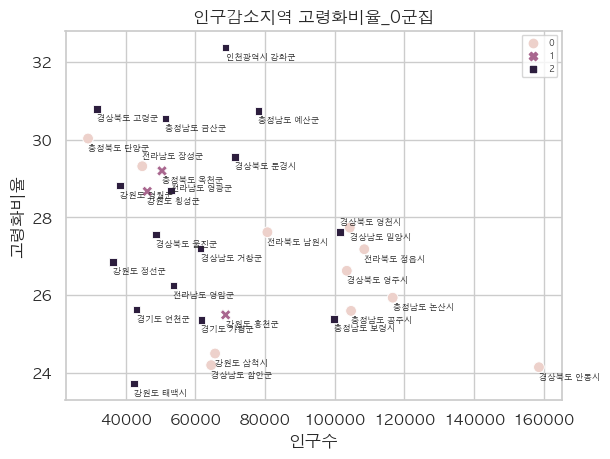

In [21]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

rc('font', family='AppleGothic')
sns.set(font='AppleGothic', rc={'axes.unicode_minus':False}, style='whitegrid')

sns.scatterplot(x='인구수', y='고령화비율', hue='cluster', style='cluster',s=60,data=df)

df.reset_index(inplace=True)
for i in range(len(df)):
    row=df.iloc[i]
    name=row['시군구']
    x = row['인구수']
    y = row['고령화비율']
    if name in ['전라남도 장성군','경상북도 영천시']:
        plt.text(x, y+0.2, name, fontsize=6)
    elif name in ['전라남도 영광군']:
        plt.text(x,y,name, fontsize=6)
    else :
        plt.text(x-0.5,y-0.3,name,fontsize=6)
df.set_index('시군구', inplace=True)

plt.title('인구감소지역 고령화비율_0군집')
plt.xlabel('인구수')
plt.ylabel('고령화비율')
plt.legend(fontsize=6)
plt.savefig('output/aging_rate_0.png', bbox_inches='tight')
plt.show()

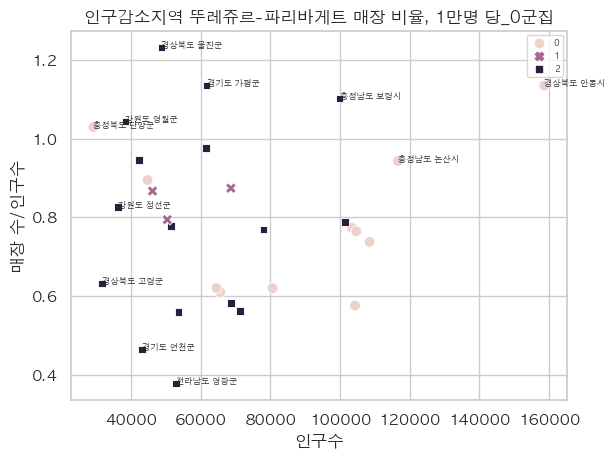

In [22]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

rc('font', family='AppleGothic')
sns.set(font='AppleGothic', rc={'axes.unicode_minus':False}, style='whitegrid')

sns.scatterplot(x='인구수', y='만명당 매장 수', hue='cluster', style='cluster', s=60,data=df)

df.reset_index(inplace=True)
for i in range(len(df)):
    row=df.iloc[i]
    name=row['시군구']
    x = row['인구수']
    y = row['만명당 매장 수']
    if name in ['경상북도 울진군','경기도 가평군','충청남도 보령시','경상북도 안동시','충청남도 논산시','전라남도 영광군',
               '경기도 연천군','경상북도 고령군','강원도 영월군','충청북도 단양군','강원도 정선군']:
        plt.text(x,y,name,fontsize=6)
    else :
        pass
df.set_index('시군구', inplace=True)

plt.title('인구감소지역 뚜레쥬르-파리바게트 매장 비율, 1만명 당_0군집')
plt.xlabel('인구수')
plt.ylabel('매장 수/인구수')
plt.legend(fontsize=6)
plt.savefig('output/bakery_0.png', bbox_inches='tight')
plt.show()

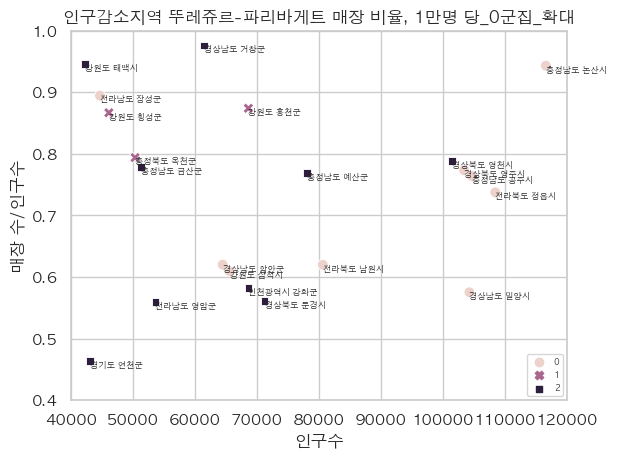

In [23]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

rc('font', family='AppleGothic')
sns.set(font='AppleGothic', rc={'axes.unicode_minus':False}, style='whitegrid')

sns.scatterplot(x='인구수', y='만명당 매장 수', hue='cluster', style='cluster', s=60,data=df)

df.reset_index(inplace=True)
for i in range(len(df)):
    row=df.iloc[i]
    name=row['시군구']
    x = row['인구수']
    y = row['만명당 매장 수']
    if name in ['경상북도 울진군','경기도 가평군','충청남도 보령시','경상북도 안동시','전라남도 영광군',
               '경상북도 고령군','강원도 영월군','충청북도 단양군','강원도 정선군']:
        pass
    else :
        plt.text(x, y-0.01, name, fontsize=6)
df.set_index('시군구', inplace=True)

plt.axis([40000,120000,0.4,1])
plt.title('인구감소지역 뚜레쥬르-파리바게트 매장 비율, 1만명 당_0군집_확대')
plt.xlabel('인구수')
plt.ylabel('매장 수/인구수')
plt.legend(fontsize=6)
plt.savefig('output/bakery_0_zoom.png', bbox_inches='tight')
plt.show()